<a href="https://www.kaggle.com/code/rohitkumarma23m011/churn-prediction?scriptVersionId=199391435" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:

df= pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(columns= ['RowNumber', 'CustomerId','Surname'],inplace=True)

In [6]:
df=pd.get_dummies(df,columns= ['Geography','Gender'],drop_first= True,dtype= int )

In [7]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [8]:
X= df.drop(columns= ['Exited'])
y= pd.DataFrame(df.Exited)

In [9]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler
model= StandardScaler()
X_trained_scale= model.fit_transform(X_train)
X_test_scale= model.fit_transform(X_test)

 X_trained_scale[12]

In [13]:
X_trained_scale

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2024-10-03 18:46:01.801029: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 18:46:01.801185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 18:46:01.964346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
model= Sequential()
model.add(Dense(10,activation= 'relu', input_dim= 11))

model.add(Dense(1,activation= 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss= "binary_crossentropy",optimizer= 'Adam',metrics=['accuracy'])

In [18]:
callback= EarlyStopping(monitor='val_loss',min_delta= .00001,patience= 14,verbose= 1,mode= 'auto',baseline= None,restore_best_weights= False)

In [19]:
 history = model.fit(X_trained_scale,y_train, epochs=150,validation_split=0.2,callbacks=callback)

Epoch 1/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7937 - loss: 0.5236 - val_accuracy: 0.8012 - val_loss: 0.4935
Epoch 2/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8093 - loss: 0.4640 - val_accuracy: 0.8112 - val_loss: 0.4668
Epoch 3/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8105 - loss: 0.4417 - val_accuracy: 0.8119 - val_loss: 0.4516
Epoch 4/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8166 - loss: 0.4303 - val_accuracy: 0.8131 - val_loss: 0.4410
Epoch 5/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4248 - val_accuracy: 0.8175 - val_loss: 0.4323
Epoch 6/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8173 - loss: 0.4192 - val_accuracy: 0.8181 - val_loss: 0.4241
Epoch 7/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8173 - loss: 0.4213 - val_accuracy: 0.8194 - val_loss: 0.4170
Epoch 8/150
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8334 - loss: 0.4012 - val_accu

In [20]:
history.history

{'accuracy': [0.8001562356948853,
  0.8064062595367432,
  0.8103125095367432,
  0.8148437738418579,
  0.8151562213897705,
  0.8185937404632568,
  0.8229687213897705,
  0.8254687786102295,
  0.8254687786102295,
  0.8264062404632568,
  0.8264062404632568,
  0.8274999856948853,
  0.8282812237739563,
  0.8284375071525574,
  0.8303124904632568,
  0.8314062356948853,
  0.83203125,
  0.8356249928474426,
  0.8349999785423279,
  0.8343750238418579,
  0.8353124856948853,
  0.835156261920929,
  0.8357812762260437,
  0.835156261920929,
  0.8374999761581421,
  0.8421875238418579,
  0.8423437476158142,
  0.8451562523841858,
  0.8446875214576721,
  0.8435937762260437,
  0.8457812666893005,
  0.8428124785423279,
  0.8467187285423279,
  0.8475000262260437,
  0.84765625,
  0.8464062213897705,
  0.8473437428474426,
  0.8482812643051147,
  0.8498437404632568,
  0.8492187261581421,
  0.8500000238418579,
  0.8493750095367432,
  0.8496875166893005,
  0.848437488079071,
  0.8496875166893005,
  0.8509374856948

In [21]:
model.layers[0].get_weights()

[array([[-0.02230323,  0.17956778, -0.21515578, -0.20319855,  0.34127036,
          0.16867578,  0.02096882, -0.14900585, -0.04244177, -0.02812769],
        [ 0.46722347, -0.9805822 , -0.42804003, -0.67147976, -0.5868794 ,
          0.33144963,  0.3668637 , -0.10770304, -0.685191  ,  0.37976447],
        [-0.06612381, -0.20846207, -0.17065252, -0.01981876,  0.56290615,
          0.1379075 ,  0.06875672, -0.18247847,  0.27663457,  0.3000555 ],
        [ 0.35385612, -0.05144591, -1.2170354 , -0.10733297, -0.6465897 ,
         -0.21059547, -0.31842566, -0.15154132, -0.68882483,  0.0435545 ],
        [-1.7652676 , -0.51160395, -2.056765  , -0.44793576, -1.6918911 ,
         -0.44037643, -0.87628514, -0.54717857, -0.60124946, -0.55750716],
        [ 0.13175303, -0.15287834,  0.1005456 ,  0.05708256, -0.12313844,
          0.04953223,  0.08549006,  0.3522382 ,  0.07649055,  0.23052894],
        [-0.3439098 , -0.28922793,  0.29947838, -0.15881689,  0.6672263 ,
          0.6090399 ,  1.3749866

In [22]:
model.layers[1].get_weights()

[array([[ 0.778617  ],
        [-1.0541507 ],
        [ 1.1554718 ],
        [-0.8574634 ],
        [ 0.92568994],
        [-0.7446397 ],
        [-0.97822535],
        [-0.41566643],
        [-1.0947115 ],
        [-0.6889259 ]], dtype=float32),
 array([1.2287359], dtype=float32)]

In [23]:
y_log =model.predict(X_test_scale)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
y_predict= np.where(y_log<0.5,0,1)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.86

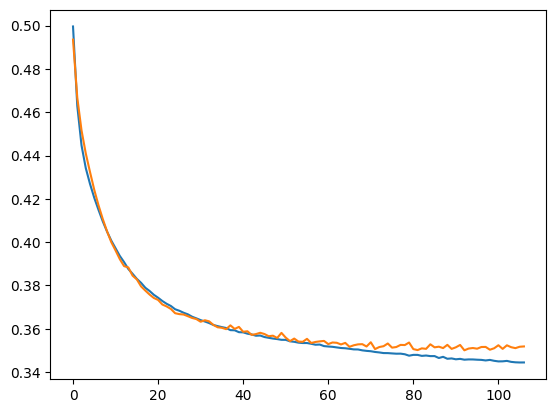

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

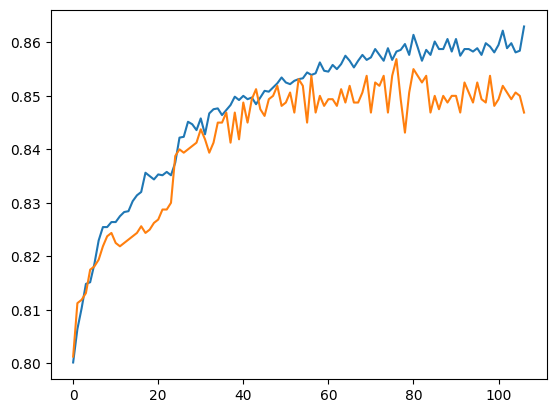

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])